# 1.查看数据

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#读取数据
train_raw_data=pd.read_csv('./train.csv')
test_raw_data=pd.read_csv('./test.csv')

In [3]:
#查看数据,info()方法可以看到表格里面的缺失值信息以及数据类型

train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#为了后面的特征工程方便，我们分离训练数据和标签

trainrow=train_raw_data.shape[0]                                     #训练数据的行数
testrow=test_raw_data.shape[0]                                       #测试数据的行数
y_train=train_raw_data['Survived'].copy()                            #保存训练数据的标签，一般均保存为y_train
train_raw_data = train_raw_data.drop(columns=['Survived'])           #也可以用train_raw_data.drop(['Survived'], axis=1)方法
train_raw_data                                                       #可以看到已经将标签和特征分开了

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_raw_data            #训练集和测试集的特征信息一致

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#將两个列表按照沿着行方向合并（axis=0），即上下拼接

combine=pd.concat([train_raw_data,test_raw_data],  ignore_index=True)     #将默认axis=0，ignore_index=True表示忽略原来的index（即行号）
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print(combine.shape)                         #查看合并后的数据集shape
print(train_raw_data.shape)
print(test_raw_data.shape)

(1309, 11)
(891, 11)
(418, 11)


# 2.数据处理（简单特征工程）

In [8]:
#接下来我们要对数据进行缺失值的处理

In [9]:
#查看数据集中缺失值的分布状况,ascending=False表示降序排列，True则表示升序排列

combine.isnull().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

#有四项特征带有缺失值，按照从小到大数目依次是Fare，Embarked，Age，Cabin；我们接下来考虑一步步填充它们

In [10]:
#['Cabin']的缺失值较多，先以'U'标记(表示Unknown，让其单独成为一类)
combine['Cabin']=combine['Cabin'].fillna('U')
combine['Cabin'].value_counts()
combine['Cabin']=combine['Cabin'].astype(str).str[0]      #其他的都取首字母标记
combine.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [11]:
#Embarked的填充

combine.loc[combine['Embarked'].isnull()]             #定位到缺失值的未知

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [12]:
#查看combine['Embarked']的分布情况

combine['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
#S最多，C其次，Q最少，选取S最多的

combine['Embarked'] = combine['Embarked'].fillna("S")     #高级一点的用法：combine['Embarked'] = combine['Embarked'].fillna(combine['Embarked'].value_counts())
combine.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

In [14]:
#Fare的填充
#定位

combine.loc[combine['Fare'].isnull()]     #

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [15]:
#我们可以想象一下船票会和什么有关系，主要是pclass和性别还有年龄，因此我们可以定位到与该乘客类似的人

combine.loc[(combine['Pclass']==3) & (combine['Sex']=="male") & (combine['Age']<65) & (combine['Age']>55)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,U,S
152,153,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,U,S
326,327,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,U,S
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [16]:
#缺失值的填充其实也类似于预测的过程，我们可以取和这个乘客相同条件（比如年龄，性别、船舱相关）的或者近似条件的乘客的平均值或者中位数
#由于这里只有一个值，我们可以大概取一个平均数

combine.loc[(combine['Pclass']==3) & (combine['Sex']=="male") & (combine['Age']>60)].dropna()['Fare'].mean()
combine['Fare'] = combine['Fare'].fillna(combine.loc[(combine['Pclass']==3) & (combine['Sex']=="male") & (combine['Age']<65) & (combine['Age']>55)].dropna()['Fare'].mean())

In [17]:
#[Fare]的缺失值填充结束

combine['Fare'].isnull().sum()

0

In [18]:
#首先是名字信息的提取，这里用了大家广泛采用的方式

def getTitle(name):
    str1=name.split( ',' )[1] #Mr. Owen Harris
    str2=str1.split( '.' )[0]#Mr
    #strip() 方法用于移除字符串头尾指定的字符（默认为空格）
    str3=str2.strip()
    return str3

#map函数：对Series每个数据应用自定义的函数计算

combine['Title'] = combine['Name'].map(getTitle)
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
the Countess      1
Mme               1
Don               1
Lady              1
Dona              1
Sir               1
Capt              1
Jonkheer          1
Name: Title, dtype: int64

In [19]:
#用一个字典对其进行分类

title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                   "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                   "Master" :    "Master",
                   "Lady" :      "Royalty"
                    }
combine['Title'] = combine['Title'].map(title_mapDict)
combine['Title']

0            Mr
1           Mrs
2          Miss
3           Mrs
4            Mr
         ...   
1304         Mr
1305    Royalty
1306         Mr
1307         Mr
1308     Master
Name: Title, Length: 1309, dtype: object

In [20]:
#将Title分为了6类

combine['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

也有用combine.Name.str.extract('([A-Za-z]+)\.', expand=False)方法的

In [21]:
#因为Name特征已经提取完了，所以我们要再DF里面去掉它

combine=combine.drop(['Name'],1)               #去掉name列，其等价于  combine=combine.drop(columns=['Name']) 

In [22]:
#SibSp'和Parch合并为familysize特征

combine['familysize']=combine['SibSp']+combine['Parch']+1
combine['familysize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familysize, dtype: int64

In [23]:
#去掉['SibSp','Parch']列
combine=combine.drop(['SibSp','Parch'],1)
combine.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familysize
0,1,3,male,22.0,A/5 21171,7.2500,U,S,Mr,2
1,2,1,female,38.0,PC 17599,71.2833,C,C,Mrs,2
2,3,3,female,26.0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1,female,35.0,113803,53.1000,C,S,Mrs,2
4,5,3,male,35.0,373450,8.0500,U,S,Mr,1


In [24]:
#PassengerId无用可以去点暂时不讨论，所以都去掉
combine = combine.drop(['PassengerId'], 1)

In [25]:
#性别换为数值类型

combine['Sex'] = combine['Sex'].map({'female':1, 'male':0})
combine.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familysize
0,3,0,22.0,A/5 21171,7.2500,U,S,Mr,2
1,1,1,38.0,PC 17599,71.2833,C,C,Mrs,2
2,3,1,26.0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,1,1,35.0,113803,53.1000,C,S,Mrs,2
4,3,0,35.0,373450,8.0500,U,S,Mr,1


接下来是比较关键分类，fare，familysize,age都是连续值，根据实际值的意义再进行分类（分成几个等级），这样拟合的效果会比单个特征的连续值效果要好

In [26]:
#留意到一个细节，就是在Title为Master的人当中起年龄最大也就是14.5岁，而小孩的生存率比较高，所以在对['Title']=='Master']填充的时候要注意

combine.loc[combine['Title']=='Master']['Age'].value_counts().sort_values()

0.67     1
0.42     1
0.33     1
12.00    1
5.00     1
14.50    1
0.75     1
11.50    1
0.92     1
10.00    2
11.00    2
13.00    3
8.00     3
7.00     3
0.83     3
3.00     4
6.00     4
9.00     5
1.00     5
4.00     5
2.00     5
Name: Age, dtype: int64

In [27]:
combine.loc[combine['Age'].isnull()]['Title'].value_counts()  #年龄为空值的title为Master的有8个，我们將这8个填充

Mr         176
Miss        50
Mrs         28
Master       8
Officer      1
Name: Title, dtype: int64

In [28]:
#我们计算出master中的平均年龄

master_aveage = combine[combine['Age'].notnull() & combine['Title'].str.contains('Master')]['Age'].mean()
master_aveage

5.482641509433963

In [29]:
#定位到这几个缺失年龄的Master

combine[combine['Age'].isnull()  & combine['Title'].str.contains('Master')]

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familysize
65,3,0,NaN,2661,15.2458,U,C,Master,3
159,3,0,NaN,CA. 2343,69.5500,U,S,Master,11
176,3,0,NaN,4133,25.4667,U,S,Master,5
709,3,0,NaN,2661,15.2458,U,C,Master,3
1135,3,0,NaN,W./C. 6607,23.4500,U,S,Master,4
1230,3,0,NaN,2622,7.2292,U,C,Master,1
1235,3,0,NaN,A/5. 851,14.5000,U,S,Master,3
1308,3,0,NaN,2668,22.3583,U,C,Master,3


In [30]:
Index_master_age_null = [65,159,176,709,1135,1230,1235,1308]
for i in Index_master_age_null:
    combine.loc[i,'Age'] = master_aveage

combine[combine['Age'].isnull()  & combine['Title'].str.contains('Master')] 

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familysize


In [31]:
combine.isnull().sum()        #接下来是[Age]的缺失值填充，先看其数量，263个已经填充了8个所以还有255个

Pclass          0
Sex             0
Age           255
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
familysize      0
dtype: int64

In [32]:
#再看其与哪些因素有关，用相关系数矩阵查看

df_corr = combine.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']

#可以看到与船舱等级有关（>0.3），另外，我们还要考虑性别

,Feature 1,Feature 2,Correlation Coefficient
3,Age,Age,1.000000
8,Age,Pclass,0.414324
9,Age,familysize,0.251228
17,Age,Fare,0.178109
21,Age,Sex,0.053080


In [33]:
#用年龄性别和船舱去分类，用对应的中位数去填充

age_by_pclass_sex  = combine.groupby(['Sex', 'Pclass']).median()['Age']
for pclass in range(1, 4):
    for sex in [1, 0]:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(combine['Age'].median()))
pd.DataFrame(age_by_pclass_sex)                #查看DF

Median age of Pclass 1 1s: 36.0
Median age of Pclass 1 0s: 42.0
Median age of Pclass 2 1s: 28.0
Median age of Pclass 2 0s: 29.5
Median age of Pclass 3 1s: 22.0
Median age of Pclass 3 0s: 25.0
Median age of all passengers: 28.0


Age
Sex Pclass      
0   1       42.0
    2       29.5
    3       25.0
1   1       36.0
    2       28.0
    3       22.0

In [34]:
#用中位数填充，按照不同的船舱等级

combine['Age'] = combine.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
combine.isnull().sum()

Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin         0
Embarked      0
Title         0
familysize    0
dtype: int64

这里我们用了简单的统计学信息去填充‘Age’中缺失的信息；还可以建立模型依靠已知的‘Age’信息去填充未知的‘Age’信息

接下来是比较关键分类，即age，fare，familysize,可以根据实际值再进行分类，分成几个等级，这样的效果会比直接用连续值预测好

In [35]:
#这里我们用了常识对年龄进行一个大概的分类为

combine['Age_band'] = combine['Age'].map(lambda x: 'Child' if x<12 else 'Youth' if x<18 else 'Adult' if x<30 else 'Middle' if x<50 else 'Old' if x<70 else 'Very old' if x>=70 else 'null')

In [36]:
#Age信息已经用过了，可以去掉Age

combine = combine.drop(columns=['Age'])

In [37]:
combine

,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Title,familysize,Age_band
0,3,0,A/5 21171,7.2500,U,S,Mr,2,Adult
1,1,1,PC 17599,71.2833,C,C,Mrs,2,Middle
2,3,1,STON/O2. 3101282,7.9250,U,S,Miss,1,Adult
3,1,1,113803,53.1000,C,S,Mrs,2,Middle
4,3,0,373450,8.0500,U,S,Mr,1,Middle
...,...,...,...,...,...,...,...,...,...
1304,3,0,A.5. 3236,8.0500,U,S,Mr,1,Adult
1305,1,1,PC 17758,108.9000,C,C,Royalty,1,Middle
1306,3,0,SOTON/O.Q. 3101262,7.2500,U,S,Mr,1,Middle
1307,3,0,359309,8.0500,U,S,Mr,1,Adult


In [38]:
#对费用用了比较细致的处理，分成13段

combine['Fare_Category'] = pd.qcut(combine['Fare'],13)

In [39]:
combine['Fare_Category']

0          (-0.001, 7.25]
1        (56.496, 83.475]
2           (7.896, 8.05]
3        (34.075, 56.496]
4           (7.896, 8.05]
              ...        
1304        (7.896, 8.05]
1305    (83.475, 512.329]
1306       (-0.001, 7.25]
1307        (7.896, 8.05]
1308      (15.742, 23.25]
Name: Fare_Category, Length: 1309, dtype: category
Categories (13, interval[float64]): [(-0.001, 7.25] < (7.25, 7.75] < (7.75, 7.896] < (7.896, 8.05] ... (26.55, 34.075] < (34.075, 56.496] < (56.496, 83.475] < (83.475, 512.329]]

In [40]:
#Fare信息已经用过了，可以去掉Fare

combine = combine.drop(columns=['Fare'])

In [41]:
combine

,Pclass,Sex,Ticket,Cabin,Embarked,Title,familysize,Age_band,Fare_Category
0,3,0,A/5 21171,U,S,Mr,2,Adult,"(-0.001, 7.25]"
1,1,1,PC 17599,C,C,Mrs,2,Middle,"(56.496, 83.475]"
2,3,1,STON/O2. 3101282,U,S,Miss,1,Adult,"(7.896, 8.05]"
3,1,1,113803,C,S,Mrs,2,Middle,"(34.075, 56.496]"
4,3,0,373450,U,S,Mr,1,Middle,"(7.896, 8.05]"
...,...,...,...,...,...,...,...,...,...
1304,3,0,A.5. 3236,U,S,Mr,1,Adult,"(7.896, 8.05]"
1305,1,1,PC 17758,C,C,Royalty,1,Middle,"(83.475, 512.329]"
1306,3,0,SOTON/O.Q. 3101262,U,S,Mr,1,Middle,"(-0.001, 7.25]"
1307,3,0,359309,U,S,Mr,1,Adult,"(7.896, 8.05]"


In [42]:
#家庭大小分类，这里分成四类

combine['familysize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familysize, dtype: int64

In [43]:
combine['FamilySize']=combine['familysize'].map(lambda x:'Single_family' if x<2 else 'Small_family' if x<4 else 'Middle_family' if x<8 else 'Large_family')

In [44]:
#familysize信息已经用过了，可以去掉

combine = combine.drop(columns=['familysize'])

In [45]:
combine

,Pclass,Sex,Ticket,Cabin,Embarked,Title,Age_band,Fare_Category,FamilySize
0,3,0,A/5 21171,U,S,Mr,Adult,"(-0.001, 7.25]",Small_family
1,1,1,PC 17599,C,C,Mrs,Middle,"(56.496, 83.475]",Small_family
2,3,1,STON/O2. 3101282,U,S,Miss,Adult,"(7.896, 8.05]",Single_family
3,1,1,113803,C,S,Mrs,Middle,"(34.075, 56.496]",Small_family
4,3,0,373450,U,S,Mr,Middle,"(7.896, 8.05]",Single_family
...,...,...,...,...,...,...,...,...,...
1304,3,0,A.5. 3236,U,S,Mr,Adult,"(7.896, 8.05]",Single_family
1305,1,1,PC 17758,C,C,Royalty,Middle,"(83.475, 512.329]",Single_family
1306,3,0,SOTON/O.Q. 3101262,U,S,Mr,Middle,"(-0.001, 7.25]",Single_family
1307,3,0,359309,U,S,Mr,Adult,"(7.896, 8.05]",Single_family


In [46]:
#到此还没有挖掘Ticket

In [47]:
#以下讨论ticket特征
combine['Ticket'].value_counts()

CA. 2343             11
CA 2144               8
1601                  8
PC 17608              7
3101295               7
                     ..
SOTON/O.Q. 392078     1
370374                1
SC/AH Basle 541       1
350404                1
2658                  1
Name: Ticket, Length: 929, dtype: int64

In [48]:
combine['Ticket'] = combine['Ticket'].replace('/', '', regex=True)     #去掉ticket中的 '\'
combine['Ticket'] = combine['Ticket'].replace('\.', '', regex=True)    #去掉ticket中的 '/'

In [49]:
def split_ticket(ticket):
    return ticket.split(' ')
combine['Ticket'] = combine['Ticket'].map(split_ticket)         #去掉ticket中的空格
combine['Ticket']

0              [A5, 21171]
1              [PC, 17599]
2        [STONO2, 3101282]
3                 [113803]
4                 [373450]
               ...        
1304            [A5, 3236]
1305           [PC, 17758]
1306    [SOTONOQ, 3101262]
1307              [359309]
1308                [2668]
Name: Ticket, Length: 1309, dtype: object

In [50]:
ticket = []
for i in combine['Ticket']:
    if len(i) > 1:
        ticket.append(i[0])
    else:
        ticket.append("XX")
        
combine['Ticket'] = ticket

In [51]:
#one_hot编码
combine=pd.get_dummies(columns=['Pclass','Sex','Cabin','Embarked','Title','Age_band','Fare_Category','FamilySize','Ticket'],data=combine)
combine.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XX
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 3.模型的建立和结果预测

In [52]:
#定义训练数据和测试数据

x_train=combine.iloc[:trainrow]
x_test=combine.iloc[trainrow:]

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
#训练数据标准化

scaler=StandardScaler()
scaler.fit(x_train)
x_scaled_train=scaler.transform(x_train)
x_scaled_train

array([[-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382, -1.71536523],
       [ 1.76776695, -0.51015154, -1.10792599, ..., -0.10653984,
        -0.05812382, -1.71536523],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382, -1.71536523],
       ...,
       [-0.56568542, -0.51015154,  0.90258736, ...,  9.38616002,
        -0.05812382, -1.71536523],
       [ 1.76776695, -0.51015154, -1.10792599, ..., -0.10653984,
        -0.05812382,  0.58296623],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382,  0.58296623]])

In [55]:
#测试数据标准化

x_scaled_test=scaler.transform(x_test)
x_scaled_test

array([[-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382,  0.58296623],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382,  0.58296623],
       [-0.56568542,  1.96020185, -1.10792599, ..., -0.10653984,
        -0.05812382,  0.58296623],
       ...,
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382, -1.71536523],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382,  0.58296623],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.10653984,
        -0.05812382,  0.58296623]])

实际上这次例子中没有标准化好像对预测准确率没有明显影响

# 逻辑回归

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#采用网格搜索对模型参数进行选择
#给出参数可能的字典
para_grid = {
    'penalty':['l1', 'l2'],
    'class_weight':['None', 'balanced'],            #这里选择了两种参数，正则项和类别的权重
}

#待调参的模型
logreg = LogisticRegression()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=4)

# 确定网格搜索参数
grid_search=GridSearchCV(
    logreg,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1  #输出进度
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_logreg = LogisticRegression(**parameters)
best_logreg.fit(x_scaled_train,y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best score: 0.8058619157273865

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished



best parameters: {'class_weight': 'None', 'penalty': 'l2'}


LogisticRegression(class_weight='None')

In [57]:
best_logreg

LogisticRegression(class_weight='None')

In [58]:
best_logreg.score(x_scaled_train,y_train)           #在训练集上的结果还可以

0.8496071829405163

In [59]:
logreg_score_train = round(best_logreg.score(x_scaled_train,y_train)  * 100, 2)
logreg_score_train

84.96

In [60]:
best_logreg_score = cross_val_score(best_logreg, x_scaled_train, y_train, cv=4, scoring=None)  #但是交叉验证结果很差
print(best_logreg_score)

[0.77130045 0.82959641 0.79372197 0.82882883]


In [61]:
y_pred = best_logreg.predict(x_scaled_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'n_neighbors':range(2,20),
    'weights':['uniform', 'distance'],            #这里选择了三种参数，N值，距离计算方式，以及投票权重
    'p':[1,2]
}

#待调参的模型
knn = KNeighborsClassifier()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    knn,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1  #输出进度
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_knn = KNeighborsClassifier(**parameters)
best_knn.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best score: 0.8204381394764922
best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    8.4s finished


KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [63]:
best_knn

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [64]:
best_knn.score(x_scaled_train,y_train)        #在训练集上的结果很好

0.9349046015712682

In [65]:
knn_score_train = round(best_knn.score(x_scaled_train,y_train)  * 100, 2)
knn_score_train

93.49

In [66]:
best_knn_score = cross_val_score(knn, x_scaled_train, y_train, cv=5, scoring=None)  #但是交叉验证结果很差，很明显过拟合
print(best_knn_score)

[0.72067039 0.76404494 0.76966292 0.79213483 0.82022472]


In [67]:
y_pred = best_knn.predict(x_scaled_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 朴素贝叶斯（高斯型）

In [68]:
from sklearn.naive_bayes import GaussianNB

#朴素贝叶斯的高斯型没有参数，因此不需要进行优化，直接运行

best_GaussianNB = GaussianNB()
best_GaussianNB.fit(x_scaled_train,y_train)

GaussianNB()

In [69]:
best_GaussianNB.score(x_scaled_train,y_train)      #训练结果很差

0.44107744107744107

In [70]:
GaussianNB_score_train = round(best_GaussianNB.score(x_scaled_train,y_train)  * 100, 2)
GaussianNB_score_train

44.11

In [71]:
best_GaussianNB_score = cross_val_score(best_GaussianNB, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果很差
print(best_GaussianNB_score)

[0.44843049 0.44843049 0.40358744 0.41891892]


In [72]:
y_pred = best_GaussianNB.predict(x_scaled_test)          #说明贝叶斯模型不适合该问题的预测
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 朴素贝叶斯（多项式型）

由于标准化的过程中出现了负值，多项式型朴素贝叶斯无法拟合

In [73]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score


#best_MultinomialNB = MultinomialNB()
#best_MultinomialNB.fit(x_scaled_train,y_train)      #看了一下，多项式的好像无法拟合，应该是因为标准化的原因(产生了负值)

# 朴素贝叶斯（伯努利型）

In [74]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

best_BernoulliNB = BernoulliNB()
best_BernoulliNB.fit(x_scaled_train,y_train)

BernoulliNB()

In [75]:
best_BernoulliNB.score(x_scaled_train,y_train)        #训练结果还可以，伯努利的形式比较符合二项分布相比于高斯型，效果要好很多，可能是因为假设不符合的原因（）

0.7968574635241302

In [76]:
BernoulliNB_score_train = round(best_BernoulliNB.score(x_scaled_train,y_train)  * 100, 2)
BernoulliNB_score_train

79.69

In [77]:
best_BernoulliNB_score = cross_val_score(best_BernoulliNB, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果还可以
print(best_BernoulliNB_score)

[0.75784753 0.78026906 0.78026906 0.8018018 ]


In [78]:
y_pred = best_BernoulliNB.predict(x_scaled_test)          
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# 决策树（Decision Tree）

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'criterion':['gini', 'entropy'],           #特征选择标准是基尼指数还是交叉熵
    'splitter':['best', 'random'],             #随机分裂还是最佳分裂点
    'max_features':['sqrt','auto','log2'],     #划分时考虑的最大特征数
    'min_samples_leaf':range(1,5),             #叶子节点虽小样本数，小于该样本数将会被剪枝
    'min_samples_split':range(2,10),           #内部节点划分所需最小的样本数
    #‘max_depth’:[3, 6, 7],                  #决策树最大深度，默认不输入
    #‘max_leaf_nodes’:[100,200]              #最大叶子节点数。默认是None，即不限制最大的叶子节点数量
}

#待调参的模型
DecisionTree = DecisionTreeClassifier()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    DecisionTree,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1  #输出进度
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_DecisionTree = DecisionTreeClassifier(**parameters)
best_DecisionTree.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best score: 0.8248885820099178
best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:    3.5s finished


DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=7)

In [80]:
best_DecisionTree

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=7)

In [81]:
best_DecisionTree.score(x_scaled_train,y_train)        #训练结果还可以

0.8843995510662177

In [82]:
DecisionTree_score_train = round(best_DecisionTree.score(x_scaled_train,y_train)  * 100, 2)
DecisionTree_score_train

88.44

In [83]:
best_DecisionTree_score = cross_val_score(best_DecisionTree, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_DecisionTree_score)

[0.77130045 0.84753363 0.77578475 0.83333333]


In [84]:
y_pred = best_DecisionTree.predict(x_scaled_test)       
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 线性支持向量机(LinearSVC)

In [85]:
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'penalty':['l1', 'l2'],                    #l1正则化还是l2正则化
    'C':[0.5, 1, 2],                           #正则化参数，c越小正则化权重越大
    'class_weight':['None', 'balanced'],      #随机分裂还是最佳分裂点
    'loss':['Hinge', 'squared_hinge']
}

#待调参的模型
linearSVC = LinearSVC()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    linearSVC,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1  #输出进度
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_linearSVC = LinearSVC(**parameters)
best_linearSVC.fit(x_scaled_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.0s finished


best score: 0.8013809553700332
best parameters: {'C': 2, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'penalty': 'l2'}


LinearSVC(C=2, class_weight='balanced')

In [86]:
best_linearSVC

LinearSVC(C=2, class_weight='balanced')

In [87]:
best_linearSVC.score(x_scaled_train,y_train)

0.8361391694725028

In [88]:
linearSVC_score_train = round(best_linearSVC.score(x_scaled_train,y_train)  * 100, 2)
linearSVC_score_train

83.61

In [89]:
best_linearSVC_score = cross_val_score(best_linearSVC, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_linearSVC_score)

[0.76233184 0.81165919 0.78475336 0.84684685]


In [90]:
y_pred = best_DecisionTree.predict(x_scaled_test)       
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 非线性支持向量机(SVC)

In [91]:
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
         #损失函数合页损失或者其平方
    'kernel':['rbf', 'linear', 'poly', 'Sigmoid']
}

#待调参的模型
svc = SVC()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    svc,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1  #输出进度
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_svc = SVC(**parameters)
best_svc.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best score: 0.8103257799259307
best parameters: {'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished


SVC()

In [92]:
best_svc

SVC()

In [93]:
best_svc.score(x_scaled_train,y_train)                            #训练结果还可以

0.8574635241301908

In [94]:
svc_score_train = round(best_svc.score(x_scaled_train,y_train)  * 100, 2)
svc_score_train

85.75

In [95]:
best_svc_score = cross_val_score(best_svc, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_svc_score)

[0.78923767 0.8206278  0.76681614 0.81981982]


In [96]:
y_pred = best_svc.predict(x_scaled_test)       
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 随机森林（RF）

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'n_estimators' : [600, 1750],                   #基学习器个数
    'oob_score' : ['True', 'False'],                #是否用袋外模型
   #'max_features' : ['log2', 'sqrt', 'auto'],
    'max_depth': [4, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
}

#待调参的模型
rfc = RandomForestClassifier(warm_start=True, random_state=42)

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    rfc,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1,                                     #输出进度
    n_jobs=-1
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_rfc = RandomForestClassifier(**parameters)
best_rfc.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.3min finished


best score: 0.8249074132195091
best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600, 'oob_score': 'True'}


RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=600,
                       oob_score='True')

In [98]:
best_rfc

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=600,
                       oob_score='True')

In [99]:
best_rfc.score(x_scaled_train, y_train)

0.8574635241301908

In [100]:
rfc_score_train = round(best_rfc.score(x_scaled_train,y_train)  * 100, 2)
rfc_score_train

85.75

In [101]:
best_rfc_score = cross_val_score(best_rfc, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_rfc_score)

[0.8161435  0.84304933 0.8161435  0.81981982]


In [102]:
y_pred = best_rfc.predict(x_scaled_test)       
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# XGBOOST

In [103]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'n_estimators' : [100, 600, 1750],               #基学习器个数
    'sub_sample': [0.6, 0.8],                        #选择对样本采样的程度
    'max_depth': [3, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
}

#待调参的模型
xgb = XGBClassifier()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    xgb,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1,                                     #输出进度
    n_jobs=7
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_xgb = XGBClassifier(**parameters)
best_xgb.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   10.4s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   59.2s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  3.1min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  6.8min
[Parallel(n_jobs=7)]: Done 810 out of 810 | elapsed:  7.2min finished


[18:55:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best score: 0.8271734354403366
best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'sub_sample': 0.6}
[18:55:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, min_samples_leaf=2, min_samples_split=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, sub_sample=0.6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, min_samples_leaf=2, min_samples_split=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, sub_sample=0.6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
best_xgb.score(x_scaled_train,y_train)

0.9259259259259259

In [106]:
xgb_score_train = round(best_xgb.score(x_scaled_train,y_train)  * 100, 2)
xgb_score_train

92.59

In [107]:
best_xgb_score = cross_val_score(best_xgb, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_rfc_score)

[18:55:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:55:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:55:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_spli

In [108]:
y_pred = best_xgb.predict(x_scaled_test)       
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# GBDT

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'n_estimators' : [100, 600, 1750],               #基学习器个数
    'max_depth': [3, 6, 7],
    'subsample': [0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
}

#待调参的模型
gbdt =  GradientBoostingClassifier()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=5)

# 确定网格搜索参数
grid_search=GridSearchCV(
    gbdt,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1,                                     #输出进度
    n_jobs=7
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_gbdt = GradientBoostingClassifier(**parameters)
best_gbdt.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    5.9s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   37.7s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  4.3min
[Parallel(n_jobs=7)]: Done 810 out of 810 | elapsed:  4.5min finished


best score: 0.8372795179210344
best parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}


GradientBoostingClassifier(max_depth=6, min_samples_leaf=2, subsample=0.6)

In [110]:
best_gbdt

GradientBoostingClassifier(max_depth=6, min_samples_leaf=2, subsample=0.6)

In [111]:
best_gbdt.score(x_scaled_train,y_train)                          #和XGBOOST结果差不多

0.9270482603815937

In [112]:
gbdt_score_train = round(best_gbdt.score(x_scaled_train,y_train)  * 100, 2)
gbdt_score_train

92.7

In [113]:
best_gbdt_score = cross_val_score(best_gbdt, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_gbdt_score)

[0.79372197 0.84304933 0.80717489 0.84684685]


In [114]:
y_pred = best_gbdt.predict(x_scaled_test)       
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Adaboost

In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#给出参数可能的字典
para_grid = {
    'n_estimators' : [50, 100, 600, 1750],               #基学习器个数
    'algorithm': ['SAMME','SAMMR.R'],
}

#待调参的模型
adaboost = AdaBoostClassifier()

#5折随机生成交叉验证集
cross_validation = StratifiedKFold(n_splits=4)

# 确定网格搜索参数
grid_search=GridSearchCV(
    adaboost,
    param_grid = para_grid,
    scoring='accuracy',
    cv = cross_validation,
    verbose=1,                                     #输出进度
    n_jobs=7
)

# 训练模型
grid_search.fit(x_scaled_train,y_train)
model = grid_search
parameters = grid_search.best_params_

print('best score: {}'.format(grid_search.best_score_))
print('best parameters: {}'.format(parameters))

best_adaboost = AdaBoostClassifier(**parameters)
best_adaboost.fit(x_scaled_train,y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  32 out of  32 | elapsed:    7.0s finished


best score: 0.8148305255928574
best parameters: {'algorithm': 'SAMME', 'n_estimators': 600}


AdaBoostClassifier(algorithm='SAMME', n_estimators=600)

In [116]:
best_adaboost                                                  

AdaBoostClassifier(algorithm='SAMME', n_estimators=600)

In [117]:
best_adaboost.score(x_scaled_train,y_train)                          #训练集的表现一般般

0.8372615039281706

In [118]:
adaboost_score_train = round(best_adaboost.score(x_scaled_train,y_train)  * 100, 2)
adaboost_score_train

83.73

In [119]:
best_adaboost_score = cross_val_score(best_adaboost, x_scaled_train, y_train, cv=4, scoring=None)  #交叉验证结果也还可以
print(best_adaboost_score)

[0.79372197 0.82959641 0.80717489 0.82882883]


In [120]:
y_pred = best_adaboost.predict(x_scaled_test)       
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

结果比较

In [132]:
passengerids=test_raw_data['PassengerId']
passengerids.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [133]:
submission = pd.DataFrame({
        "PassengerId": passengerids,
        "Survived": y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [134]:
submission.to_csv('Newsubmission.csv', index=False)

In [121]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN ', 'GaussianNB',
              'BernoulliNB','Decision Tree', 'LinearSVC', 'SVC',
              'Random Forest', 'XGB Classifier', 'GBDT', 'Adaboost'
              ],
    'Train_Score': [logreg_score_train, knn_score_train, GaussianNB_score_train, 
                    BernoulliNB_score_train, DecisionTree_score_train, linearSVC_score_train, svc_score_train,
              rfc_score_train, xgb_score_train, gbdt_score_train, adaboost_score_train
                   ],
     'Test_Score': [75.60 , 72.01, 39.95,
                    74.64, 74.64, 74.64, 76.56,
                   79.19, 77.51, 77.75, 75.84]})
results = results.sort_values(by='Train_Score', ascending=False)
#result_df = result_df.set_index('Train_Score')
results

,Model,Train_Score,Test_Score
1,KNN,93.49,72.01
9,GBDT,92.70,77.75
8,XGB Classifier,92.59,77.51
4,Decision Tree,88.44,74.64
6,SVC,85.75,76.56
7,Random Forest,85.75,79.19
0,Logistic Regression,84.96,75.60
10,Adaboost,83.73,75.84
5,LinearSVC,83.61,74.64
3,BernoulliNB,79.69,74.64


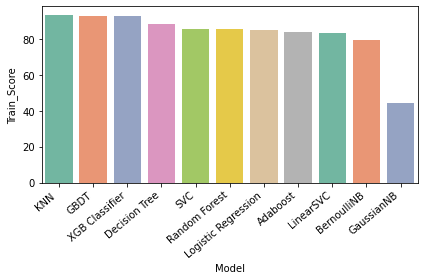

In [122]:
import matplotlib.pyplot as plt

result_df = results.sort_values(by='Train_Score', ascending=False)
ax = sns.barplot(x="Model", y="Train_Score",data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")



plt.tight_layout()
plt.show()

简单的KNN模型对训练数据有着最高的拟合能力；
GBDT、XGB、DecisionTree其次；
SVC、Random Forest、Logistic Regression、Adaboost、LinearSVC则没有表现出很大的差距；
Naive Bayes性能垫底，Gaussion NB则更是差到只有不到45%的准确率，说明数据的前验概率不符合高斯分布，BernoulliNB则有将近75%的准确率，说明数据更加符合二项分布，另外一方面可以说明naive Bayes的特征独立假设在这次案例中对样本数据还是有一定程度的偏离的；
面将进一步讨论测试集的结果。

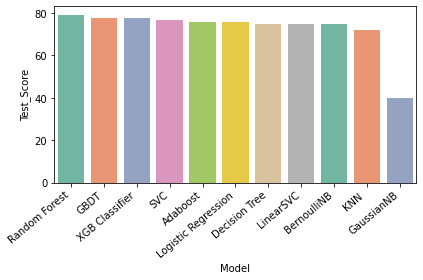

In [123]:
result_df = results.sort_values(by='Test_Score', ascending=False)

ax = sns.barplot(x="Model", y="Test_Score",data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")



plt.tight_layout()
plt.show()

测试集分数将序排列如上

In [124]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN ', 'GaussianNB',
              'BernoulliNB','Decision Tree', 'LinearSVC', 'SVC',
              'Random Forest', 'XGB Classifier', 'GBDT', 'Adaboost'
              ] * 2,
    'ScoreCatetgory': ['train'] * 11 + ['test'] * 11,
     'Score': [logreg_score_train, knn_score_train, GaussianNB_score_train, 
                    BernoulliNB_score_train, DecisionTree_score_train, linearSVC_score_train, svc_score_train,
              rfc_score_train, xgb_score_train, gbdt_score_train, adaboost_score_train
                   ] + [75.60 , 72.01, 39.95,
                    74.64, 74.64, 74.64, 76.56,
                   79.19, 77.51, 77.75, 75.84]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Train_Score')
result_df

,Model,ScoreCatetgory,Score
1,KNN,train,93.49
9,GBDT,train,92.70
8,XGB Classifier,train,92.59
4,Decision Tree,train,88.44
6,SVC,train,85.75
7,Random Forest,train,85.75
0,Logistic Regression,train,84.96
10,Adaboost,train,83.73
5,LinearSVC,train,83.61
3,BernoulliNB,train,79.69


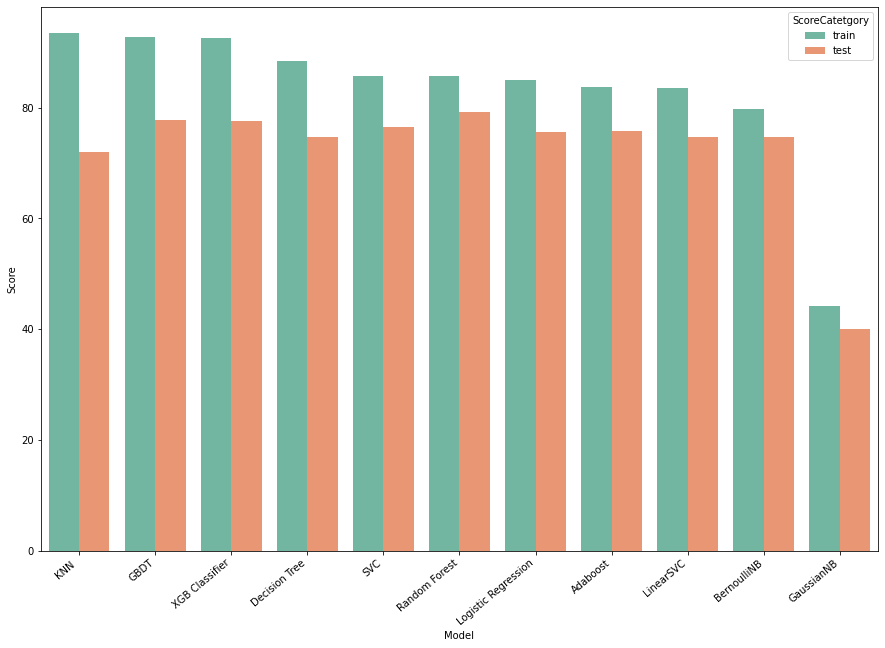

In [129]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Model", y="Score",hue='ScoreCatetgory', data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

基本上都有不同程度的过拟合，KNN模型的过拟合最严重

1.KNN模型有着最高的训练准确率，但是却有着几乎最低的测试准确率，其根本原因是KNN是一种懒惰学习，没有显式的训练过程，它在训练阶段只是将样本保存起来（利用KD树或者其他储存结构），当收到测试样本再进行处理，其训练严重依赖于样本，其风险函数是经验风险最小化，所以导致其在测试集表现不好。

2.几个集成模型的比较：总体来说，集成模型相比于单个学习器的效果要好，体现出了他们的优势；但是有一点比较明显的是随机森林的训练集准确率和测试机准确率之差是最小的，因为随机森林是bagging模型，随机抽样和随机抽取特征，是降低方差的模型（抗数据扰动能力较强，所以一定程度上牺牲了偏差，即在训练集上的准确率）；另外简单说一下GBDT和XGBOOST，GBDT是没有正则项的，是尽量去拟合经验风险的，是经验风险最小化，而XGBDT加入了正则项，并且是用二阶导数求解的，收敛更快（但是本次项目相对来说比较简答，没有体现出它的优势），另外其过拟合相对来说也比较严重，可能是基学习器个数太多，这里没有作更深入的探究。

3.单学习器中的SVC的表现是最好的，后面的逻辑回归、线性支持向量机、决策树、BernoulliNB则没有表现出太大的差异；这里也不太好对它们进行比较。

本次测试结果在kaggle上的测试准确率79.19%，排名前12%左右，总体上了解了数据挖掘的大体流程，以及一些主要算法的应用；还有本次的特征工程整体来说比较简单，还有很多东西没有考虑到，后面还会进一步更新。